# Pymaceuticals Inc.
---

### Analysis

This study is based on 249 mice with squamous cell carcinoma (SCC) tumors. The gender distribution, with 51% male and 49% female.

The mice were subjected to a range of 10 drug regimens over the course of 45 days. Tumor development was observed and measured. The primary focus is on comparing the performance of Capomulin against Ramicane, Infubinol, and Ceftamin.

- Mouse ID g989 was dropped from the analysis due to duplicated data
- The bar plot comparing Drug Regimen versus the number of observed mouse timepoints indicates that Capomulin and Ramicane have the highest counts observations over the 45-day period. 
- Drug regimen based on IQR; Capomulin, Ramicane and Ceftamin had no potential outlier. Infubinol had potential outliers with tumor volume of   36.321346 mm3.
- At the end of 45 days study, mice subjected to Capomulin and Ramicane had the lowest tumor volume.
- The line plot shows response of Single mouse to Capomulin treatment. The size of the tumor increased over the initial 20-days and reduced over next 15-days and started to increase after. 

Based on the available data, it can be deduced that Capomulin and Remicane demonstrated a higher chance to reduce tumor size. However, further tests would be required to reach a conclusion. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
 
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
 
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
 
# Combine the data into a single DataFrame
combine_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
 
# Display the data table for preview
combine_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combine_data['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint


# refered to https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html  to get duplicates
identifying_duplicates = combine_data.duplicated(subset=["Mouse ID", "Timepoint"])

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combine_data.loc[identifying_duplicates,"Mouse ID"].unique()
duplicate_mice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_ID = combine_data.loc[combine_data["Mouse ID"] == "g989", :]
duplicate_mice_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

drop_mouse = combine_data[combine_data["Mouse ID"] == "g989"].index

clean_df = combine_data.drop(drop_mouse)
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df ["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# ----

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen = clean_df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = drug_regimen["Tumor Volume (mm3)"].mean()
median_tumor_volume = drug_regimen["Tumor Volume (mm3)"].median()
var_tumor_volume = drug_regimen["Tumor Volume (mm3)"].var()
std_tumor_volume = drug_regimen["Tumor Volume (mm3)"].std()
sem_tumor_volume = drug_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                           "Median Tumor Volume": median_tumor_volume,
                           "Tumor Volume Variance": var_tumor_volume,
                           "Tumor Volume Std. Dev.": std_tumor_volume,
                           "Tumor Volume Std. Err.": sem_tumor_volume
})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# referred to https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html

aggregation_summary_df = clean_df.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
aggregation_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

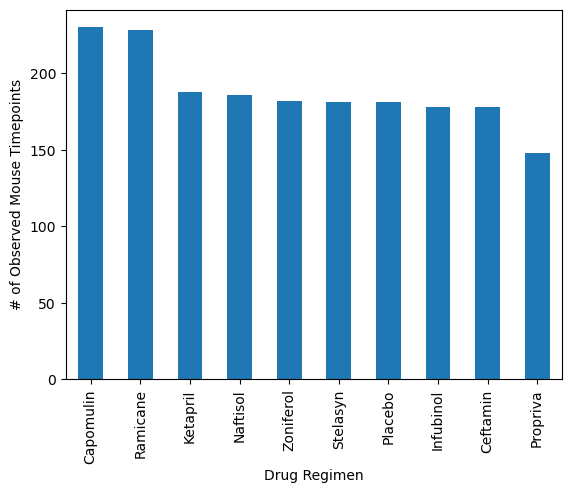

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count the number of rows for each drug regimen
count_per_regimen = clean_df["Drug Regimen"].value_counts()

# Bar Plot using Pandas
count_per_regimen.plot(kind="bar")

# Give the chart x and y label
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Display plot
plt.show()


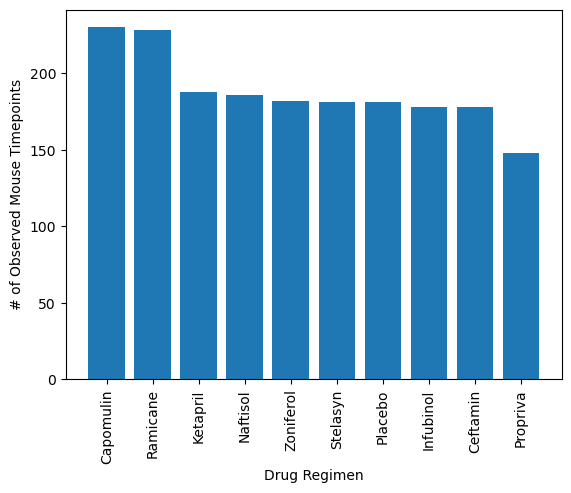

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Count the number of rows for each drug regimen
count_per_regimen = clean_df["Drug Regimen"].value_counts()

# Create a bar chart using pyplot
plt.bar(count_per_regimen.index, count_per_regimen, align = "center")

# Create the ticks 
plt.xticks(rotation = 90)

# Give the chart x and y label
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Display plot
plt.show()

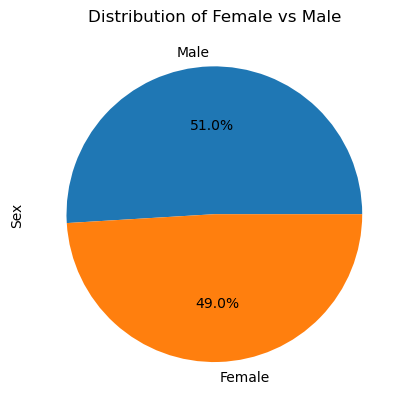

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_df["Sex"].value_counts()

# Pie Plot using Pandas
gender_distribution.plot(kind="pie", autopct="%1.1f%%")

# Give the chart title and y label
plt.title("Distribution of Female vs Male")
plt.ylabel("Sex")

# Display plot
plt.show()

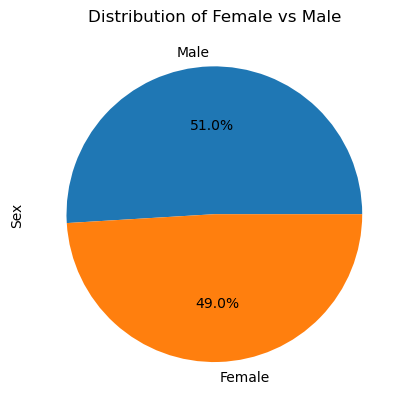

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = clean_df["Sex"].value_counts()

# Pie Plot using pyplot
plt.pie(gender_distribution, labels=gender_distribution.index, autopct="%1.1f%%")

# Give the chart title and y label
plt.title("Distribution of Female vs Male")
plt.ylabel("Sex")

# Display plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# --------

# Get the last (greatest) timepoint for each mouse
last_timepoint_df = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint_df, clean_df, on=["Mouse ID", "Timepoint"], how="left")

# Regimens to filter only Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Filter the DataFrame based on regimens selected
filtered_data = merged_data[merged_data["Drug Regimen"].isin(regimens)]

# Print data
print(filtered_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]])

    Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen
0       a203         45           67.973419    Infubinol
1       a251         45           65.525743    Infubinol
3       a275         45           62.999356     Ceftamin
6       a411         45           38.407618     Ramicane
7       a444         45           43.047543     Ramicane
..       ...        ...                 ...          ...
238     y769         45           68.594745     Ceftamin
239     y793         45           31.896238    Capomulin
240     y865         45           64.729837     Ceftamin
244     z578         45           30.638696     Ramicane
245     z581         45           62.754451    Infubinol

[100 rows x 4 columns]


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
# ------

# A DatFrame that has the last timepoint for each mouse ID is created using groupby.
last_timepoint_df = clean_df.groupby("Mouse ID")["Timepoint"].max()

# The index of the DataFrame is reset.
last_timepoint_df = last_timepoint_df.reset_index()

# Retrieve the maximum timepoint for each mouse.
max_timepoint_per_mouse = last_timepoint_df["Timepoint"]

# The four treatment groups, Capomulin, Ramicane, Infubinol, and Ceftamin, are put in a list.
target_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# An empty list is created to fill with tumor volume data.
tumor_volume_data = []

# Merging this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_merged_data_frame = last_timepoint_df[['Mouse ID','Timepoint']].merge(clean_df,on=['Mouse ID','Timepoint'])

# A for loop is used to display the interquartile range (IQR) and the outliers for each treatment group.
for regimen in target_regimens:
    regimen_data = timepoint_merged_data_frame.loc[timepoint_merged_data_frame["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    quartiles = regimen_data.quantile([.25, .5, .75])
    lowerQ = quartiles[0.25]
    upperQ = quartiles[0.75]
    iqr = upperQ - lowerQ
    lower_bound = lowerQ - (1.5 * iqr)
    upper_bound = upperQ + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers: {outliers}")
    
    # Append the tumor volume data to the list
    tumor_volume_data.append(regimen_data)


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


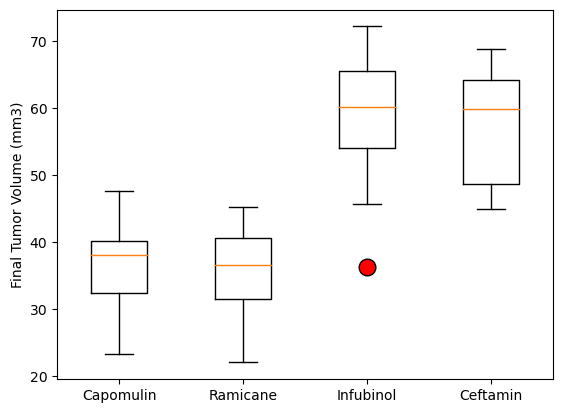

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


# Appearance of outliers in the boxplot
red_dot = dict(markerfacecolor = "red", markersize = 12)

# Boxplot showing the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=target_regimens, flierprops=red_dot)

# Set y-axis label
plt.ylabel("Final Tumor Volume (mm3)")

# Display boxplot
plt.show()


## Line and Scatter Plots

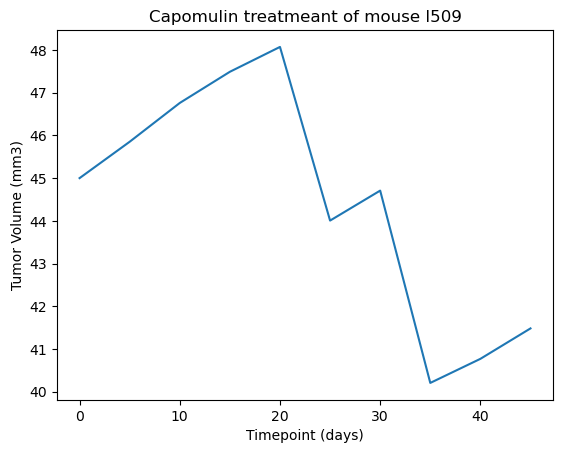

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Identify rows in the cleaned DataFrame where the Drug Regimen is 'Capomulin'
Capomulin_mouse = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

# Extract data for a single mouse ('l509') treated with Capomulin
linePlot_df = Capomulin_mouse.loc[Capomulin_mouse["Mouse ID"] == "l509",:]

# Extract the timepoints and corresponding tumor volumes for the selected mouse
x_axis = linePlot_df["Timepoint"]
y_axis = linePlot_df["Tumor Volume (mm3)"]

# Set up the plot
fig1, ax1 = plt.subplots()
plt.title("Capomulin treatment of mouse l509")
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Display line Plot
plt.show()

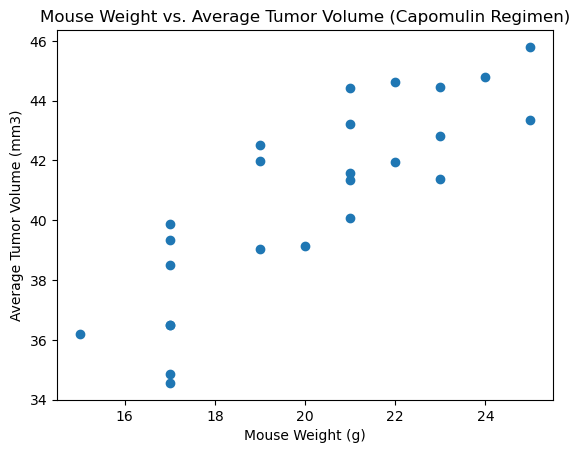

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter dataframe for Capomulin regimen
Capomulin_mouse = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

# Calculate average observed tumor volume for entire Capomulin regimen
avg_tumor_volume = Capomulin_mouse.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge with the mouse metadata to get the corresponding weight
merged_capomulin_df = pd.merge(avg_tumor_volume, mouse_metadata, on="Mouse ID")

# Generate scatter plot
plt.scatter(merged_capomulin_df["Weight (g)"], merged_capomulin_df["Tumor Volume (mm3)"])

# Set labels
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")

# Show plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


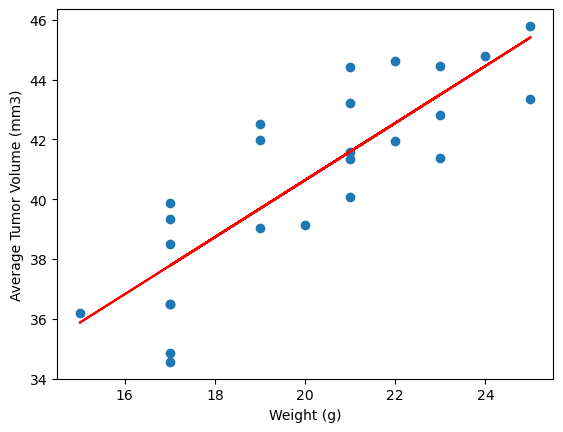

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# -------

# Calculate Pearson correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(merged_capomulin_df["Weight (g)"],merged_capomulin_df["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Linear regression to get the slope, intercept, rvalue, pvalue and stderr
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(merged_capomulin_df["Weight (g)"],merged_capomulin_df["Tumor Volume (mm3)"])
regress_values=merged_capomulin_df["Weight (g)"]* slope + intercept

# Scatter plot of mouse weight vs. average tumor volume
plt.scatter(merged_capomulin_df["Weight (g)"],merged_capomulin_df["Tumor Volume (mm3)"])

# Linear regression line on scatter plot
plt.plot(merged_capomulin_df["Weight (g)"], regress_values, color='red')

# Set labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display plot
plt.show()